# TASK #1: DATA IMPORTATION AND EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
# Read the stock data file
stocks_df = pd.read_csv('stocks_dataset.csv')
stocks_df.head()

Date         FB       TWTR       NFLX          BA          T  \
0   11/7/2013  47.560001  44.900002  46.694286  131.509995  35.110001   
1   11/8/2013  47.529999  41.650002  47.842857  133.490005  35.169998   
2  11/11/2013  46.200001  42.900002  48.272858  132.529999  35.029999   
3  11/12/2013  46.610001  41.900002  47.675713  132.330002  35.169998   
4  11/13/2013  48.709999  42.599998  47.897144  133.169998  35.070000   

         MGM        TSLA        sp500  
0  18.580000  139.770004  1747.150024  
1  19.090000  137.949997  1770.609985  
2  19.200001  144.699997  1771.890015  
3  19.260000  137.800003  1767.689941  
4  19.700001  138.699997  1782.000000

In [3]:
# Getting dataframe info
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


In [4]:
stocks_df.describe()

FB         TWTR         NFLX           BA            T  \
count  1699.000000  1699.000000  1699.000000  1699.000000  1699.000000   
mean    135.966863    31.296698   195.423654   218.325633    35.296986   
std      50.062473    11.508628   127.700712    98.968191     3.412142   
min      44.820000    14.010000    44.887142    95.010002    26.770000   
25%      88.080002    19.600001    90.474998   132.840004    32.790001   
50%     136.759995    31.610001   143.830002   158.289993    34.900002   
75%     178.075005    38.229999   320.024993   334.360001    38.004999   
max     268.440002    73.309998   548.729980   440.619995    43.470001   

               MGM         TSLA        sp500  
count  1699.000000  1699.000000  1699.000000  
mean     25.720865   311.299388  2413.219428  
std       5.200605   203.097452   424.825240  
min       7.140000   120.500000  1741.890015  
25%      21.935001   218.829994  2053.294921  
50%      25.879999   253.740005  2360.159912  
75%      29.250000   323.565002  2783.330078  
max      38.029999  1643.000000  3386.149902

# TASK #2: DATA NORMALIZATION

In [5]:
# Normalize the prices based on the initial price
def normalize(df):
    X = df.copy()
    for i in X.columns[1:]:
        X[i] = X[i]/X[i][0]
    return X

In [6]:
normalize(stocks_df)

Date        FB      TWTR       NFLX        BA         T       MGM  \
0      11/7/2013  1.000000  1.000000   1.000000  1.000000  1.000000  1.000000   
1      11/8/2013  0.999369  0.927617   1.024598  1.015056  1.001709  1.027449   
2     11/11/2013  0.971405  0.955457   1.033807  1.007756  0.997721  1.033369   
3     11/12/2013  0.980025  0.933185   1.021018  1.006235  1.001709  1.036598   
4     11/13/2013  1.024180  0.948775   1.025760  1.012623  0.998861  1.060280   
...          ...       ...       ...        ...       ...       ...       ...   
1694    8/3/2020  5.297729  0.810468  10.678394  1.233899  0.843634  0.878364   
1695    8/4/2020  5.252944  0.809577  10.914398  1.255190  0.854742  0.899892   
1696    8/5/2020  5.238015  0.819376  10.753136  1.325222  0.850185  0.899892   
1697    8/6/2020  5.577796  0.839421  10.902404  1.309406  0.849900  0.993541   
1698    8/7/2020  5.644239  0.827171  10.595087  1.292830  0.855027  1.024220   

           TSLA     sp500  
0      1.000000  1.000000  
1      0.986979  1.013428  
2      1.035272  1.014160  
3      0.985905  1.011756  
4      0.992345  1.019947  
...         ...       ...  
1694  10.624597  1.885705  
1695  10.638906  1.892516  
1696  10.624740  1.904685  
1697  10.657365  1.916927  
1698  10.393575  1.918141  

[1699 rows x 9 columns]

# TASK #3:  DATA VISUALIZATION

In [7]:
# Function to plot interactive plot
def interactive_plot(df, plot_title):
    fig = px.line(title = plot_title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    fig.show()

In [8]:
# Plot the interactive stock data chart
interactive_plot(stocks_df, 'Stock Prices')

In [9]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Stock Prices')

# TASK #4: CALCULATE DAILY RETURNS

In [10]:
# Function to calculate the daily returns 
def daily_returns(df):
    df_daily_returns = df.copy()
    for i in df.columns[1:]:
        for j in range(1, len(df)):
            df_daily_returns[i][j] = ((df[i][j] - df[i][j-1]) / (df[i][j-1])) * 100
        df_daily_returns[i][0] = 0
    return df_daily_returns

In [11]:
stocks_daily_returns = daily_returns(stocks_df)
stocks_daily_returns

Date        FB      TWTR      NFLX        BA         T        MGM  \
0      11/7/2013  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   
1      11/8/2013 -0.063082 -7.238307  2.459768  1.505597  0.170883   2.744887   
2     11/11/2013 -2.798229  3.001200  0.898778 -0.719159 -0.398064   0.576223   
3     11/12/2013  0.887446 -2.331002 -1.237020 -0.150907  0.399655   0.312495   
4     11/13/2013  4.505467  1.670635  0.464452  0.634774 -0.284328   2.284533   
...          ...       ...       ...       ...       ...       ...        ...   
1694    8/3/2020 -0.674101 -0.027481  1.992307  2.702534  0.135230   1.429459   
1695    8/4/2020 -0.845374 -0.109923  2.210104  1.725521  1.316674   2.450974   
1696    8/5/2020 -0.284196  1.210462 -1.477519  5.579446 -0.533156   0.000000   
1697    8/6/2020  6.486835  2.446311  1.388142 -1.193483 -0.033501  10.406699   
1698    8/7/2020  1.191195 -1.459273 -2.818806 -1.265966  0.603217   3.087768   

          TSLA     sp500  
0     0.000000  0.000000  
1    -1.302144  1.342756  
2     4.893077  0.072293  
3    -4.768482 -0.237039  
4     0.653116  0.809534  
...        ...       ...  
1694  3.790991  0.718102  
1695  0.134680  0.361193  
1696 -0.133153  0.642974  
1697  0.307062  0.642770  
1698 -2.475194  0.063303  

[1699 rows x 9 columns]

# TASK #5: CALCULATE BETA FOR CHOSEN STOCK

In [12]:
# Select any stock, let's say Tesla
stocks_daily_returns['TSLA']

0       0.000000
1      -1.302144
2       4.893077
3      -4.768482
4       0.653116
          ...   
1694    3.790991
1695    0.134680
1696   -0.133153
1697    0.307062
1698   -2.475194
Name: TSLA, Length: 1699, dtype: float64

In [13]:
# Select the S&P500 (Market)
stocks_daily_returns['sp500']

0       0.000000
1       1.342756
2       0.072293
3      -0.237039
4       0.809534
          ...   
1694    0.718102
1695    0.361193
1696    0.642974
1697    0.642770
1698    0.063303
Name: sp500, Length: 1699, dtype: float64

<AxesSubplot: xlabel='sp500', ylabel='TSLA'>

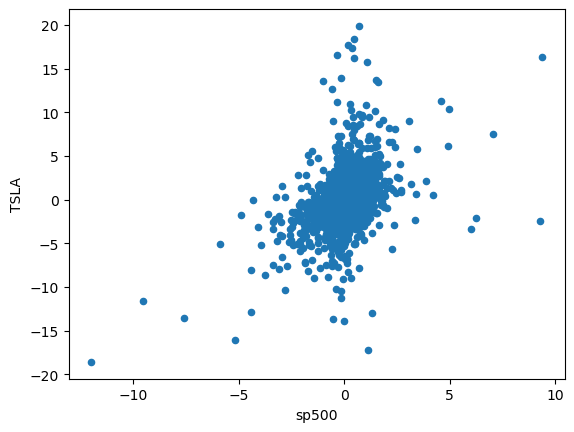

In [14]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_returns.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')

In [15]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', beta, alpha))  

Beta for TSLA stock is = 1.2359723602006576 and alpha is = 0.137162009932369


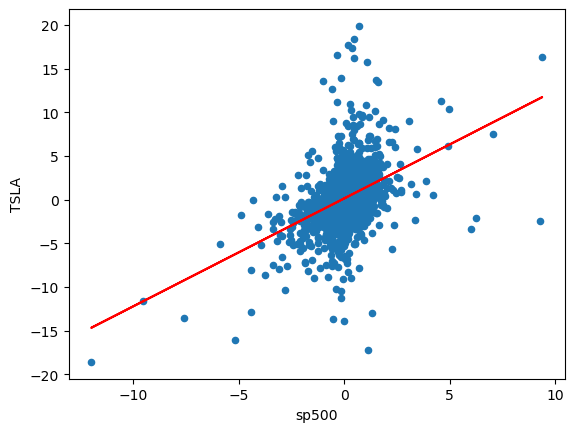

In [16]:
# Plot the scatter plot and the straight line on one plot
stocks_daily_returns.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')

# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_returns['sp500'], beta * stocks_daily_returns['sp500'] + alpha, '-', color = 'r')


# TASK #6: APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

In [17]:
beta

1.2359723602006576

In [18]:
# Calculate the average daily rate of return for S&P500
stocks_daily_returns['sp500'].mean()

0.04457361768265508

In [19]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 

rm = stocks_daily_returns['sp500'].mean() * 252
rm

11.23255165602908

In [20]:
# Assume risk free rate is zero
rf = 0

# Calculate return for any security using CAPM  
ER_TSLA =  rf + (beta * (rm - rf))

In [21]:
ER_TSLA

13.883123381378068

# TASK #7: CALCULATE BETA FOR ALL STOCKS

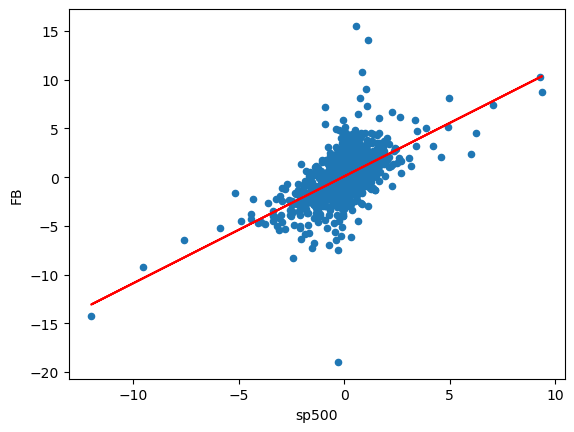

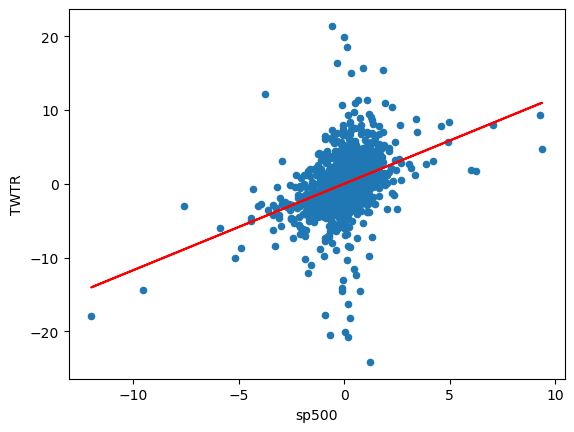

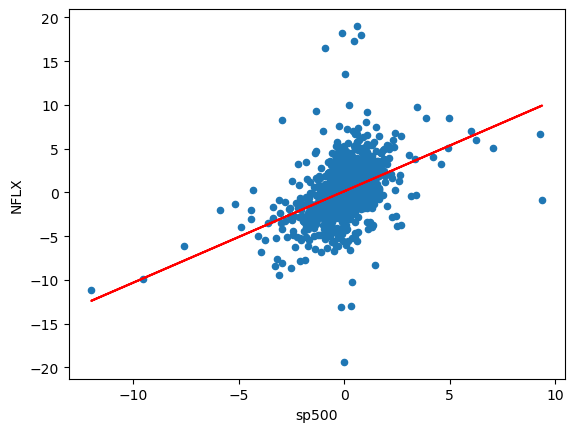

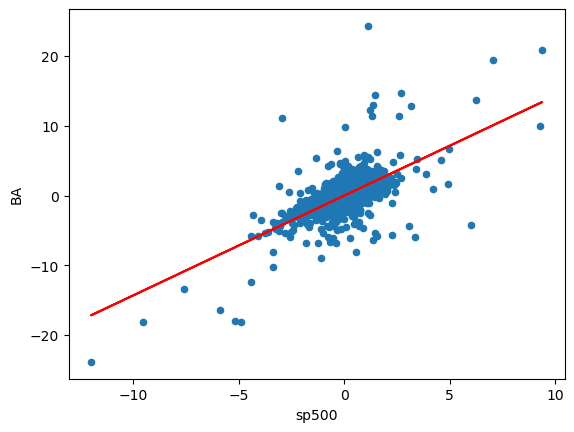

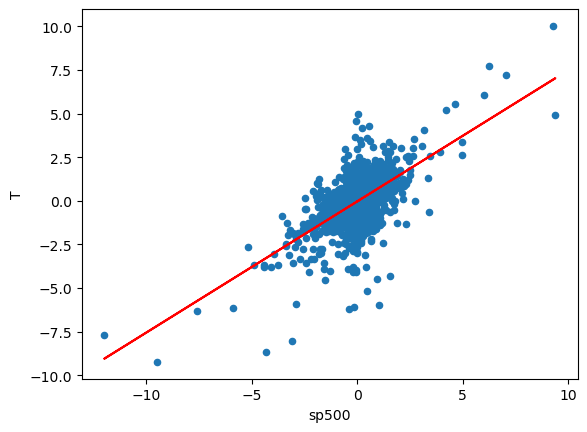

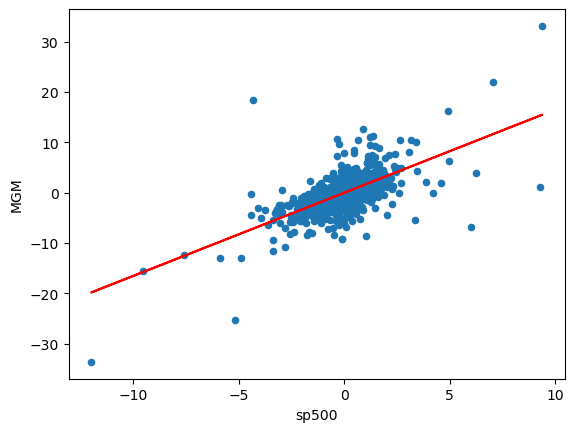

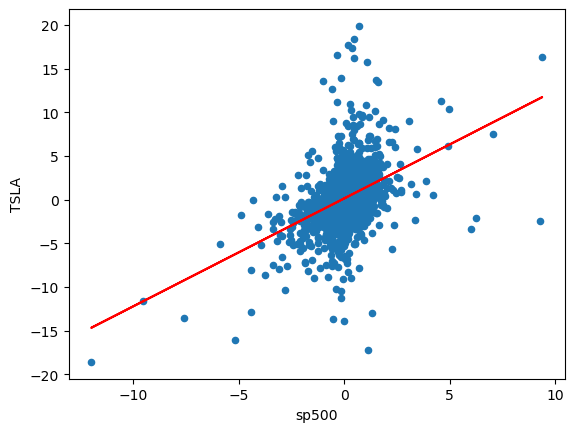

In [29]:
# Create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_returns.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_returns.plot(kind = 'scatter', x = 'sp500', y = i)
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns[i], 1)
    
    plt.plot(stocks_daily_returns['sp500'], b * stocks_daily_returns['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [23]:
# View Beta for every stock 
beta

{'FB': 1.096849088020326,
 'TWTR': 1.172359618315995,
 'NFLX': 1.0445724485449472,
 'BA': 1.4304608163084231,
 'T': 0.7523861924715606,
 'MGM': 1.6517124147928917,
 'TSLA': 1.2359723602006576}

In [24]:
# Same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_returns.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_returns, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_returns['sp500'], stocks_daily_returns[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_returns['sp500'], y = b*stocks_daily_returns['sp500'] + a)
    fig.show()